<a href="https://colab.research.google.com/github/nura6199/my-dissertation/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [38]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [39]:
# Load and preprocess the dataset (assumed to be in a CSV file)
data = pd.read_csv('dataset.csv')
X = data.drop('target', axis=1)
y = data['target']

In [40]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Standardize features using z-score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)
logreg_predictions = logreg_model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')


Logistic Regression Accuracy: 0.8525


In [44]:
# Use Logistic Regression predictions as inputs to the ANN
ann_input = np.column_stack((X_test_scaled, logreg_predictions))


In [48]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_dim=ann_input.shape[1]))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [49]:
# Train the ANN model
ann_model.fit(ann_input, y_test, epochs=10, batch_size=32)

Epoch 1/10
2/2 [==============================] - 1s 10ms/step - loss: 0.6959 - accuracy: 0.5410
Epoch 2/10
2/2 [==============================] - 0s 10ms/step - loss: 0.6493 - accuracy: 0.6066
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6111 - accuracy: 0.6557
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.5763 - accuracy: 0.7377
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 0.5459 - accuracy: 0.7869
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.5196 - accuracy: 0.8033
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 0.4951 - accuracy: 0.8197
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4748 - accuracy: 0.8525
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4542 - accuracy: 0.8689
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4356 - accuracy: 0.8852


In [50]:
# Evaluate the ANN model
ann_loss, ann_accuracy = ann_model.evaluate(ann_input, y_test)
print(f'ANN Accuracy: {ann_accuracy:.4f}')

2/2 [==============================] - 0s 7ms/step - loss: 0.4212 - accuracy: 0.8852
ANN Accuracy: 0.8852


In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for Logistic Regression model
logreg_cm = confusion_matrix(y_test, logreg_predictions)

In [52]:
# Compute predictions from the ANN model
ann_predictions = ann_model.predict(ann_input)
ann_predictions = (ann_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions


2/2 [==============================] - 0s 8ms/step


In [53]:
# Compute confusion matrix for ANN model
ann_cm = confusion_matrix(y_test, ann_predictions)


2/2 [==============================] - 0s 7ms/step


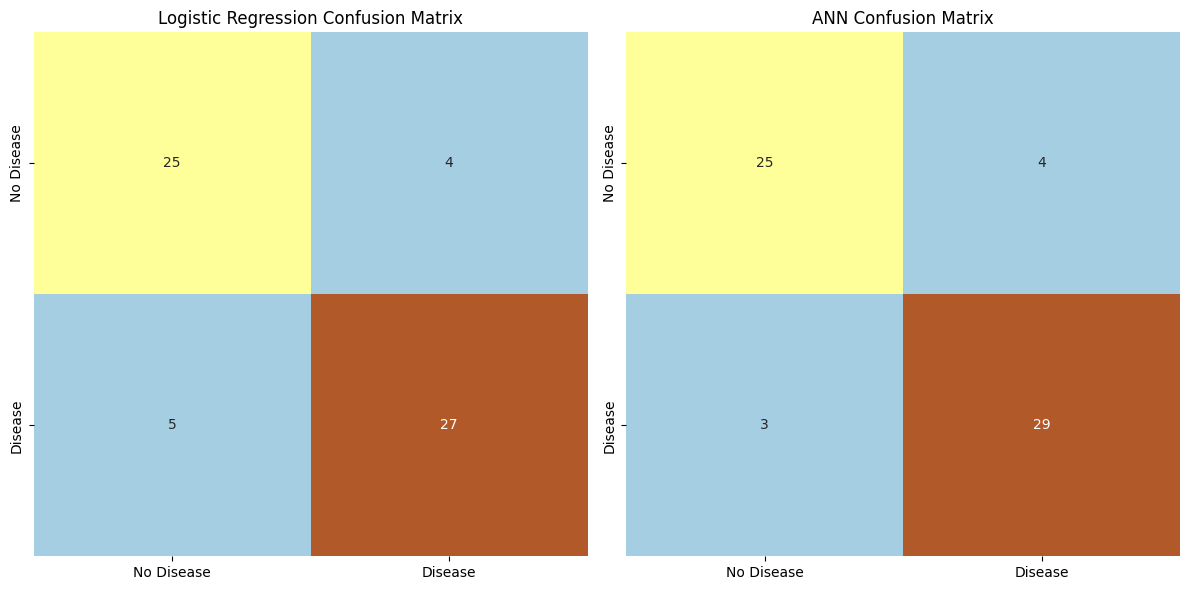

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for Logistic Regression model
logreg_cm = confusion_matrix(y_test, logreg_predictions)

# Compute predictions from the ANN model
ann_predictions = ann_model.predict(ann_input)
ann_predictions = (ann_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute confusion matrix for ANN model
ann_cm = confusion_matrix(y_test, ann_predictions)

# Define custom colormaps
custom_cmap = sns.color_palette("Paired", as_cmap=True)

# Plot confusion matrices with custom colormaps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(ann_cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('ANN Confusion Matrix')

plt.tight_layout()
plt.show()


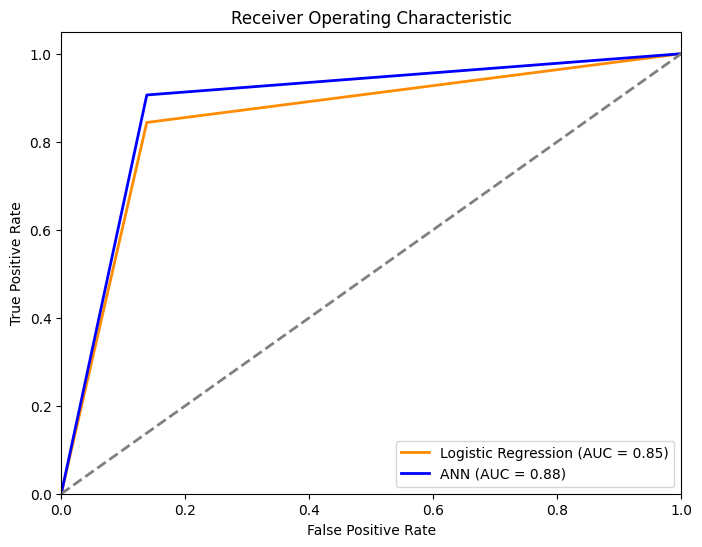

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Logistic Regression model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_predictions)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Compute ROC curve and AUC for ANN model
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_predictions)
roc_auc_ann = auc(fpr_ann, tpr_ann)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_ann, tpr_ann, color='blue', lw=2, label='ANN (AUC = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
